# Завдання 1 Граничні задач для звичайних диференціальних рівнянь другого порядку
## Завдання 1.3. Граничні умови 3-го роду (Робіна)

9) $ y'' + y'\sin x + y\cos x = e^x,\ x\in[0,\pi],\ y(0)+y'(0)=0,\ 2y(\pi)+y'(\pi)=1.$


### 1. Дискретизація області

Інтервал $[0, \pi]$ розбивається на $N$ підінтервалів з кроком

$$
h = \frac{\pi}{N}.
$$

Вузли сітки:

$$
x_i = i h, \quad i = 0, 1, 2, \ldots, N.
$$

---

### 2. Скінченні різниці

Друга похідна апроксимується **центральною різницею**:

$$
y''(x_i) \approx \frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}.
$$

Перша похідна — **центральною різницею другого порядку точності**:

$$
y'(x_i) \approx \frac{y_{i+1} - y_{i-1}}{2h}.
$$

Підставимо ці апроксимації в рівняння:

$$
\frac{y_{i-1} - 2y_i + y_{i+1}}{h^2}
+ \frac{y_{i+1} - y_{i-1}}{2h}\sin(x_i)
+ y_i\cos(x_i) = e^{x_i},
$$

що дає лінійне рівняння відносно $y_{i-1}, y_i, y_{i+1}$:

$$\boxed{
\left(\frac{1}{h^2} - \frac{\sin(x_i)}{2h}\right)y_{i-1}
+ \left(-\frac{2}{h^2} + \cos(x_i)\right)y_i
+ \left(\frac{1}{h^2} + \frac{\sin(x_i)}{2h}\right)y_{i+1}
= e^{x_i}.}
$$

---

### 3. Формування системи рівнянь

У результаті формується тридіагональна система:

$$
A\,\mathbf{y} = \mathbf{b},
$$

де:
- $A$ — матриця коефіцієнтів (тридіагональна),
- $\mathbf{y}$ — вектор невідомих значень $y_i$,
- $\mathbf{b}$ — вектор правих частин $f_i$.

---

### 4. Граничні умови Робіна

Для лівої межі:

$$
y(0) + y'(0) = 0
\quad \Rightarrow \quad
y_0 + \frac{y_1 - y_0}{h} = 0
\quad \Rightarrow \quad \boxed{(1 - \tfrac{1}{h})y_0 + \tfrac{1}{h}y_1 = 0.}
$$

Для правої межі:

$$
2y(\pi) + y'(\pi) = 1
\quad \Rightarrow \quad
2y_N + \frac{y_N - y_{N-1}}{h} = 1
\quad \Rightarrow \quad
\boxed{-\tfrac{1}{h}y_{N-1} + (2 + \tfrac{1}{h})y_N = 1.}
$$

Ці рівняння додаються як перший та останній рядки у систему $A\,\mathbf{y} = \mathbf{b}$.


In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def thomas(a, b, c, d):
    """Метод прогонки для тридіагональної системи"""
    n = len(b)
    # Прямий хід
    for i in range(1, n):
        w = a[i] / b[i - 1]
        b[i] = b[i] - w * c[i - 1]
        d[i] = d[i] - w * d[i - 1]
    # Зворотний хід
    y = np.zeros(n)
    y[-1] = d[-1] / b[-1]
    for i in range(n - 2, -1, -1):
        y[i] = (d[i] - c[i] * y[i + 1]) / b[i]
    return y

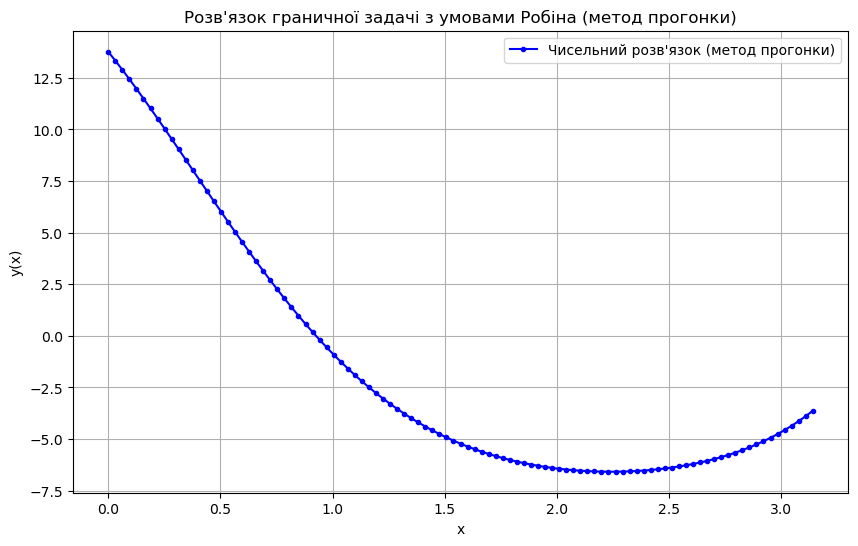

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Налаштування параметрів ---
N = 100  # Кількість точок сітки
x = np.linspace(0, np.pi, N + 1)
h = np.pi / N

# --- 2. Формування коефіцієнтів тридіагональної системи ---
a = np.zeros(N + 1)  # піддіагональ (a[0] не використовується)
b = np.zeros(N + 1)  # головна діагональ
c = np.zeros(N + 1)  # наддіагональ (c[-1] не використовується)
d = np.zeros(N + 1)  # права частина

# --- 3. Заповнення рівнянь для внутрішніх точок ---
i = np.arange(1, N)
a[i] = 1/h**2 - np.sin(x[i]) / (2*h)
b[i] = -2/h**2 + np.cos(x[i])
c[i] = 1/h**2 + np.sin(x[i]) / (2*h)
d[i] = np.exp(x[i])

# --- 4. Застосування граничних умов ---
# Ліва межа
b[0] = 1 - 1/h
c[0] = 1/h
d[0] = 0.0

# Права межа
a[N] = -1/h
b[N] = 2 + 1/h
d[N] = 1.0

# --- 5. Розв'язання системи методом прогонки ---
y = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# --- 6. Візуалізація результату ---
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Чисельний розв'язок (метод прогонки)", color='blue', marker='o', markersize=3, linestyle='-')
plt.title("Розв'язок граничної задачі з умовами Робіна (метод прогонки)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()


# Завдання 2. Граничні задачі для диференціальних рівнянь другого порядку у частинних похідних в декартовій системі координат

2.7) 
$$
\frac{\partial}{\partial x}\left(k_x \frac{\partial u}{\partial x}\right)+\frac{\partial}{\partial y}\left(k_y\frac{\partial u}{\partial y}\right)-qu=f,\qquad 
\begin{cases}
k_x=1+\ln(1+x+y),\\ k_y=1+\sqrt{x^2+y^2},\\ q=-(x+y),\\ f=\cos(x+y).
\end{cases}, \quad [A,B]\times[C,D]=[1.1,2.3]\times[1,2]
$$

Границі:
$$
\begin{cases}
u(1.1,y)=0 & (Діріхле)\\
2u-3\frac{\partial u}{\partial x}(2.3,y)=1 & (Робін)\\
u(x,1)=x & (Діріхле)\\
\frac{\partial u}{\partial y}(x,2)=1 & (Нейман)
\end{cases}
$$


Після дискретизації:
$$\frac{k_{x}{}_{i-0.5,j}}{\Delta x^{2}} u_{i-1,j} +\frac{k_{x}{}_{i+0.5,j}}{\Delta x^{2}} u_{i+1,j} +\frac{k_{y}{}_{i,j-0.5}}{\Delta y^{2}} u_{i,j-1} +\frac{k_{y}{}_{i,j+0.5}}{\Delta y^{2}} u_{i,j+1} -\left(\frac{k_{x}{}_{i+0.5,j} +k_{x}{}_{i-0.5,j}}{\Delta x^{2}} +\frac{k_{y}{}_{i,j+0.5} +k_{y}{}_{i,j-0.5}}{\Delta y^{2}} +q_{i,j}\right) u_{i,j} =f_{i,j}$$

Граничні умови:

$
u(1.1,y)=0 \Rightarrow \boxed{U_{1, j} = 0}
$

$
u(x,1)=x \Rightarrow \boxed{U_{i, 1} = x_i}
$

$
2u-3\frac{\partial u}{\partial x}(2.3, y)=1 \Rightarrow 2U_{n_x, j}-3\frac{U_{n_x, j}-U_{n_x-1, j}}{\Delta x}=1\Rightarrow \boxed{U_{n_x, j}=-\frac{3}{2\Delta x-3} U_{n_{x} -1,j}+\frac{1}{2-\frac{3}{\Delta x}}}
$

$
\frac{\partial u}{\partial y}(x, 2)=1 \Rightarrow \frac{U_{i, n_y}-U_{i, n_y-1}}{\Delta y}=1 \Rightarrow \boxed{U_{i, n_y} = U_{i, n_y-1} + \Delta y}
$

In [99]:
import numpy as np
from numba import jit

@jit(nopython=True, fastmath=True, cache=True)
def relax(ax, ay, cx, cy, b, d_rhs, n, m, U_initial, x_vec, y_vec, dx, dy, omega=1.8, eps=1e-13, max_iter=10_000, boundary_conditions=None):
    """
    Solve the linear system using the Successive Over-Relaxation (SOR) method.
    """
    U = U_initial.copy()  # Work with a copy to keep the initial guess intact
    err = 1.0
    it = 0

    inv_b = np.zeros_like(b)
    inv_b[1:-1, 1:-1] = 1.0 / b[1:-1, 1:-1]

    U = boundary_conditions(U, x_vec, y_vec, n, m, dx, dy)
    U_old = U.copy()
    
    while err > eps and it < max_iter or it < 100:
        it += 1
        
        for i in range(n):
            for j in range(m):
                U_old[i, j] = U[i, j]

        # Interior nodes (i=1..n-2, j=1..m-2)
        for i in range(1, n - 1):
            for j in range(1, m - 1):
                t = (ax[i, j] * U[i - 1, j] + cx[i, j] * U[i + 1, j] +
                     ay[i, j] * U[i, j - 1] + cy[i, j] * U[i, j + 1] -
                     d_rhs[i, j]) * inv_b[i, j]
                

                U[i, j] = t * omega + U[i, j] * (1 - omega)

        U = boundary_conditions(U, x_vec, y_vec, n, m, dx, dy)

        err = 0.0
        for i in range(1, n-1):
            for j in range(1, m-1):
                diff = abs(U[i, j] - U_old[i, j])
                if diff > err:
                    err = diff
        if it % 500 == 0:
            print("iter=", it, "err=", err)

    if it >= max_iter:
        print("Warning: Relaxation method did not converge in", max_iter, "iterations. Final error:", err)
    else:
        print("Converged in", it, "iterations. Final error:", err)


    return U

In [100]:
# --- Функції ---
def kx_fun(x, y):
    return 1 + np.log(1 + x + y)

def ky_fun(x, y):
    return 1 + np.sqrt(x**2 + y**2)

def q_fun(x, y):
    return -(x + y)

def f_fun(x, y):
    return np.cos(x + y)

In [ ]:
# --- Налаштування сітки та параметрів ---
nx = 100
ny = 100

Ax, Bx = 1.1, 2.3
Cy, Dy = 1.0, 2.0

x = np.linspace(Ax, Bx, nx)
y = np.linspace(Cy, Dy, ny)
dx = (Bx - Ax) / (nx - 1)
dy = (Dy - Cy) / (ny - 1)
X, Y = np.meshgrid(x, y, indexing='ij')

# --- Коефіцієнти рівняння у циклі ---
ax = np.empty((nx, ny))   # множник при U[i-1,j]
cx = np.empty((nx, ny))   # множник при U[i+1,j]
ay = np.empty((nx, ny))   # множник при U[i, j-1]
cy = np.empty((nx, ny))   # множник при U[i, j+1]
b  = np.empty((nx, ny))   # діагональний коефіцієнт
d_rhs = np.empty((nx, ny))

inv_dx2 = 1.0/(dx*dx)
inv_dy2 = 1.0/(dy*dy)

for i in range(nx):
    # half-індекси по x 
    x_w_half = 0.5*(x[i-1] + x[i])           if i > 0      else 0.5*(x[0]     + x[1])
    x_e_half = 0.5*(x[i]   + x[i+1])         if i < nx-1   else 0.5*(x[nx-2]  + x[nx-1])
    for j in range(ny):
        # half-індекси по y
        y_s_half = 0.5*(y[j-1] + y[j])       if j > 0      else 0.5*(y[0]     + y[1])
        y_n_half = 0.5*(y[j]   + y[j+1])     if j < ny-1   else 0.5*(y[ny-2]  + y[ny-1])

        # провідності/коефіцієнти на «гранях комірки»
        kxe = kx_fun(x_e_half, y[j])         #  (i+1/2, j)
        kxw = kx_fun(x_w_half, y[j])         #  (i-1/2, j)
        kyn = ky_fun(x[i], y_n_half)         #  (i, j+1/2)
        kys = ky_fun(x[i], y_s_half)         #  (i, j-1/2)

        # коефіцієнти 5-точкового оператора з змінними kx, ky
        cx[i, j] = kxe * inv_dx2
        ax[i, j] = kxw * inv_dx2
        cy[i, j] = kyn * inv_dy2
        ay[i, j] = kys * inv_dy2

        # діагональ + потенціальна частина q(X,Y)
        b[i, j]  = ax[i, j] + cx[i, j] + ay[i, j] + cy[i, j] + q_fun(x[i], y[j])

# права частина
d_rhs = f_fun(X, Y)

In [102]:
@jit(nopython=True, fastmath=True, cache=True)
def boundary_conditions_1(U, x_vec, y_vec, n, m, dx, dy):

    A = -3.0 / (2.0 * dx - 3.0)
    C = 1.0 / (2.0 - 3.0 / dx)
    
    # 1. Ліва межа (Діріхле)
    for j in range(m):
        U[0, j] = 0.0

    # 2. Нижня межа (Діріхле)
    for i in range(n):
        U[i, 0] = x_vec[i]

    # 3. Права межа (Робіна)
    for j in range(m):
        U[n - 1, j] = A * U[n - 2, j] + C

    # 4. Верхня межа (Неймана)
    for i in range(n):
        U[i, m - 1] = U[i, m - 2] + dy
    
    return U

In [103]:
U = np.zeros((nx, ny))

# --- Розв'язок системи ---
U_final = relax(ax, ay, cx, cy, b, d_rhs, nx, ny, U, x, y, dx, dy, omega=1.84, eps=1e-9, max_iter=50000, boundary_conditions=boundary_conditions_1)


iter= 500 err= 0.004131436351791695
iter= 1000 err= 0.0024481422692614885
iter= 1500 err= 0.001442095825486156
iter= 2000 err= 0.0008493555185298263
iter= 2500 err= 0.0005002455584595111
iter= 3000 err= 0.0002946299723589618
iter= 3500 err= 0.0001735284180037766
iter= 4000 err= 0.00010220315200992758
iter= 4500 err= 6.019466091622405e-05
iter= 5000 err= 3.545289094653015e-05
iter= 5500 err= 2.088071362926769e-05
iter= 6000 err= 1.2298128304166767e-05
iter= 6500 err= 7.2432371069908186e-06
iter= 7000 err= 4.266054355994697e-06
iter= 7500 err= 2.5125809761661344e-06
iter= 8000 err= 1.479836546636193e-06
iter= 8500 err= 8.715803527792332e-07
iter= 9000 err= 5.133352818376125e-07
iter= 9500 err= 3.023394352652531e-07
iter= 10000 err= 1.7806906704720404e-07
iter= 10500 err= 1.0487746049392399e-07
iter= 11000 err= 6.176975020366626e-08
iter= 11500 err= 3.6380574108818564e-08
iter= 12000 err= 2.1427090324266373e-08
iter= 12500 err= 1.2619928213553067e-08
iter= 13000 err= 7.432767290538322e-09

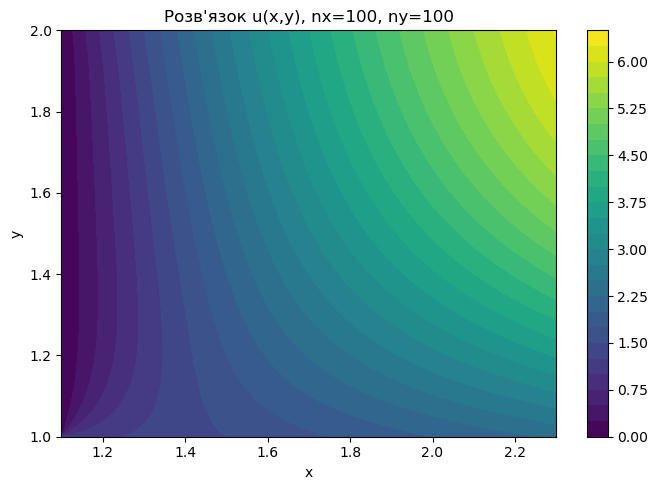

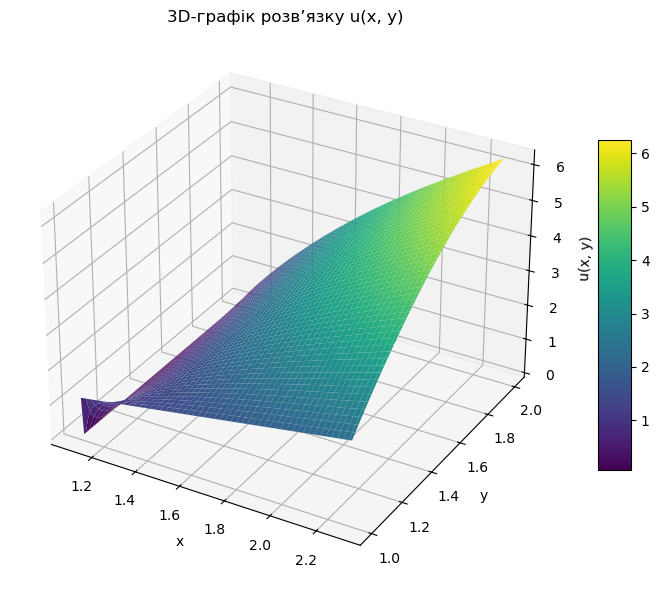

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 

# 2D-контур
fig = plt.figure(figsize=(7, 5))
c = plt.contourf(X, Y, U_final, levels=30)
plt.colorbar(c)
plt.title(f"Розв'язок u(x,y), nx={nx}, ny={ny}")
plt.xlabel("x"); plt.ylabel("y")
plt.tight_layout()
plt.show()

# 3D-поверхня
fig = plt.figure(figsize=(8, 6))
axis = fig.add_subplot(111, projection='3d')
surf = axis.plot_surface(X, Y, U_final, cmap='viridis', edgecolor='none')
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.set_zlabel('u(x, y)')
axis.set_title("3D-графік розв’язку u(x, y)")
fig.colorbar(surf, ax=axis, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()

In [105]:
# --- Verification -------------------------
# PDE:  ax*U[i-1,j] + cx*U[i+1,j] + ay*U[i, j-1] + cy*U[i, j+1] - b*U[i,j] = d_rhs

pde_residual = np.zeros_like(U_final)
for i in range(1, nx-1):
    for j in range(1, ny-1):
        Rij = (ax[i, j] * U_final[i-1, j] +
               cx[i, j] * U_final[i+1, j] +
               ay[i, j] * U_final[i, j-1] +
               cy[i, j] * U_final[i, j+1] -
               b[i, j]  * U_final[i, j] -
               d_rhs[i, j])
        pde_residual[i, j] = Rij

# 2) Граничні умови
# Ліва: Діріхле u=0
bc_left_dirichlet = np.abs(U_final[0, 1:-1])

# Нижня: Діріхле u=x
bc_bottom_dirichlet = np.abs(U_final[1:-1, 0] - x[1:-1])

# Верхня: Нейман (du/dy = 1)
bc_top_neumann = np.abs((U_final[1:-1, ny-1] - U_final[1:-1, ny-2]) / dy - 1.0)

# Права: Робін у тій же дискретній формі, що в boundary_conditions_1
A = -3.0 / (2.0 * dx - 3.0)
C =  1.0 / (2.0 - 3.0 / dx)
bc_right_robin_discrete = np.abs(U_final[nx-1, 1:-1] - (A * U_final[nx-2, 1:-1] + C))

# 3) Зведена статистика
mask_int = (slice(1, nx-1), slice(1, ny-1))
pde_max   = np.max(np.abs(pde_residual[mask_int]))
pde_l2    = np.sqrt(np.mean(pde_residual[mask_int]**2))

print("--- Verification Results ---")
print(f"PDE residual (max, interior): {pde_max: .3e}")
print(f"PDE residual (L2 , interior): {pde_l2 : .3e}")
print(f"BC left  (Dirichlet u=0)     : {np.max(bc_left_dirichlet): .3e}")
print(f"BC bottom(Dirichlet u=x)     : {np.max(bc_bottom_dirichlet): .3e}")
print(f"BC top   (Neumann du/dy=1)   : {np.max(bc_top_neumann): .3e}")
print(f"BC right (Robin, discrete)   : {np.max(bc_right_robin_discrete): .3e}")


--- Verification Results ---
PDE residual (max, interior):  5.202e-06
PDE residual (L2 , interior):  2.276e-06
BC left  (Dirichlet u=0)     :  0.000e+00
BC bottom(Dirichlet u=x)     :  0.000e+00
BC top   (Neumann du/dy=1)   :  2.842e-14
BC right (Robin, discrete)   :  1.776e-15


# Завдання 3. Рівняння Пуассона, яке задане у полярній системі координат

Загальний вигляд рівняння:
$$
\Delta u(r, \varphi) = \frac{1}{r} \frac{\partial}{\partial r} 
\left( r \frac{\partial u}{\partial r} \right)
+ \frac{1}{r^2} \frac{\partial^2 u}{\partial \varphi^2}
= f(r, \varphi)
$$


\begin{array}{l}

\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
\approx \dfrac{r_{i+0.5}\dfrac{\partial u}{\partial r}_{i+0.5,j} - r_{i-0.5}\dfrac{\partial u}{\partial r}_{i-0.5,j}}{\Delta r} 
\approx \dfrac{r_{i+0.5}\dfrac{u_{i+1,j} - u_{i,j}}{\Delta r} - r_{i-0.5}\dfrac{u_{i,j} - u_{i-1,j}}{\Delta r}}{\Delta r} 
= \dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{\Delta r^{2}} \\[1.2em]

\dfrac{1}{r}\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
\approx \dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{r_{i}\Delta r^{2}} \\[1.2em]

\dfrac{1}{r^{2}}\dfrac{\partial ^{2} u}{\partial \varphi ^{2}} 
\approx \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{r_{i}^{2}\Delta \varphi ^{2}} \\[1.2em]
\\
\dfrac{1}{r}\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
+ \dfrac{1}{r^{2}}\dfrac{\partial ^{2} u}{\partial \varphi ^{2}} 
\approx 
\dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{r_{i}\Delta r^{2}} 
+ \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{r_{i}^{2}\Delta \varphi ^{2}} \\[1.2em]

= \boxed{\frac{r_{i-0.5}}{r_{i} \Delta r^{2}} u_{i-1,j} +\frac{r_{i+0.5}}{r_{i} \Delta r^{2}} u_{i+1,j} +\frac{1}{r_{i}^{2} \Delta \varphi ^{2}} u_{i,j-1} +\frac{1}{r_{i}^{2} \Delta \varphi ^{2}} u_{i,j+1} -\left(\frac{r_{i+0.5} +r_{i-0.5}}{r_{i} \Delta r^{2}} +\frac{2}{r_{i}^{2} \Delta \varphi ^{2}}\right) u_{i,j} = f(r_i, \varphi_j)}
\end{array}


**Задача 3.4**

$$
r \in [0.7; 2.0], \quad \varphi \in \left[0, \frac{\pi}{4}\right],
\quad f(r, \varphi) = r\sin \varphi
$$

$$
u(0.7, \varphi) = 0, 
\quad \frac{\partial u}{\partial r}(2.0, \varphi) = \varphi^2
$$

$$
2u + 3\frac{\partial u}{\partial \varphi}(r, 0) = 1,
\quad
u - 2\frac{\partial u}{\partial \varphi}\left(r, \frac{\pi}{4}\right) = 0
$$


Граничні умови:


$
u(0.7, \varphi) = 0, \Rightarrow \boxed{U_{1,j} = 0}
$

$
\frac{\partial u}{\partial r}(2.0, \varphi) = \varphi^2 \Rightarrow \boxed{U_{n_r,j} = U_{n_r-1,j}+\varphi^2_j\Delta r}
$

$
2u + 3\frac{\partial u}{\partial \varphi}(r, 0) = 1, \Rightarrow \boxed{U_{i,1} =\frac{3U_{i,2} -\Delta \varphi }{3-2\Delta \varphi }}
$

$
u - 2\frac{\partial u}{\partial \varphi}\left(r, \frac{\pi}{4}\right) = 0 \Rightarrow \boxed{U_{i,n_{\varphi }} =\frac{2U_{i,n_{\varphi } -1}}{2-\Delta \varphi }}
$

In [106]:
# ---------- PDE data ----------
Rmin, Rmax = 0.7, 2.0
Phimin, Phimax = 0.0, np.pi/4
f_fun = lambda r, phi: r * np.sin(phi)

# ---------- grid ----------
nr = 121      # кількість вузлів по r
nphi = 64    # кількість вузлів по phi
r = np.linspace(Rmin, Rmax, nr)
phi = np.linspace(Phimin, Phimax, nphi)
dr = (Rmax - Rmin) / (nr - 1)
dphi = (Phimax - Phimin) / (nphi - 1)
R, Phi = np.meshgrid(r, phi, indexing='ij')

In [107]:
# півкроки
r_half = 0.5 * (r[1:] + r[:-1])          # shape: (nr-1,)
ri = r[:, None]                          # shape: (nr, 1)


# ---------- coefficients ----------
ar   = np.zeros((nr, nphi))               # для u_{i-1,j}
cr   = np.zeros((nr, nphi))               # для u_{i+1,j}
aphi = np.zeros((nr, nphi))               # для u_{i, j-1}
cphi = np.zeros((nr, nphi))               # для u_{i, j+1}
b    = np.zeros((nr, nphi))               # для u_{i,j}

for i in range(1, nr - 1):
    ri = r[i]
    r_im_half = (r[i] + r[i-1]) / 2.0
    r_ip_half = (r[i] + r[i+1]) / 2.0
    for j in range(1, nphi - 1):
        ar[i, j]   = r_im_half / (ri * dr**2)
        cr[i, j]   = r_ip_half / (ri * dr**2)
        aphi[i, j] = 1.0 / (ri**2 * dphi**2)
        cphi[i, j] = 1.0 / (ri**2 * dphi**2)
        b[i, j]    = ar[i, j] + cr[i, j] + aphi[i, j] + cphi[i, j]
        
d = f_fun(R, Phi) 

In [108]:
@jit(nopython=True, fastmath=True, cache=True)
def boundary_conditions_2(U, r_vec, phi_vec, nr, nphi, dr, dphi):
    # Граничні умови
    U[0, :] = 0

    U[nr - 1, :] = U[nr - 2, :] + phi_vec**2*dr

    U[:, 0] = (dphi - 3.0*U[:, 1]) / (2.0*dphi - 3.0)

    U[:, nphi - 1] = 2*U[:, nphi - 2] / (2.0 - dphi)
    return U

In [109]:
U = np.zeros_like(R)

# --- Розв'язок системи ---
U_final = relax(ar, aphi, cr, cphi, b, d, nr, nphi, U, r, phi, dr, dphi, omega=1.84, eps=1e-9, max_iter=100000, boundary_conditions=boundary_conditions_2)

iter= 500 err= 0.0005518154714079238
iter= 1000 err= 0.00047118190991923825
iter= 1500 err= 0.00041773107438558554
iter= 2000 err= 0.0003715550442033866
iter= 2500 err= 0.00033056364758343726
iter= 3000 err= 0.00029409979805739006
iter= 3500 err= 0.00026165854454562876
iter= 4000 err= 0.00023279580883373008
iter= 4500 err= 0.00020711683264584835
iter= 5000 err= 0.0001842704239458648
iter= 5500 err= 0.00016394413099485305
iter= 6000 err= 0.00014585996771487864
iter= 6500 err= 0.0001297706118106312
iter= 7000 err= 0.00011545602233198338
iter= 7500 err= 0.00010272043035275402
iter= 8000 err= 9.138966161392759e-05
iter= 8500 err= 8.130875446221708e-05
iter= 9000 err= 7.233984058352405e-05
iter= 9500 err= 6.436025948630686e-05
iter= 10000 err= 5.7260880971465866e-05
iter= 10500 err= 5.0944612650205556e-05
iter= 11000 err= 4.5325072093760355e-05
iter= 11500 err= 4.03254054419655e-05
iter= 12000 err= 3.58772363484583e-05
iter= 12500 err= 3.191973084915034e-05
iter= 13000 err= 2.83987653779682

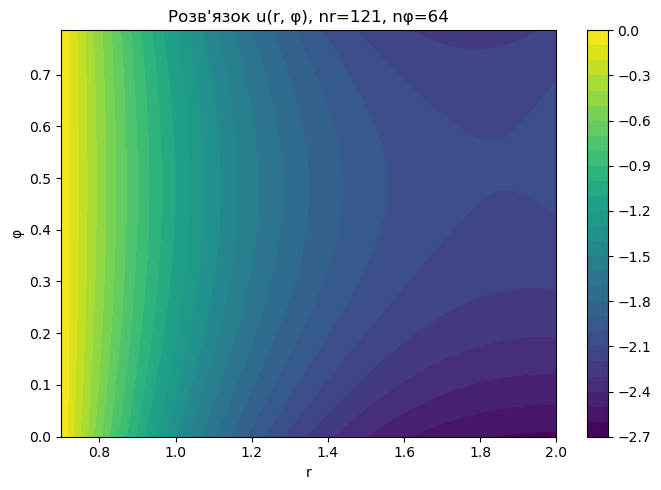

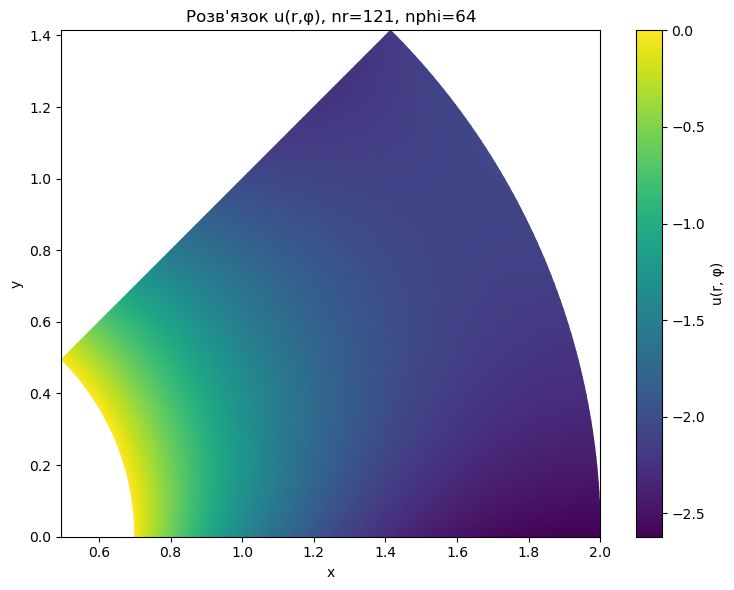

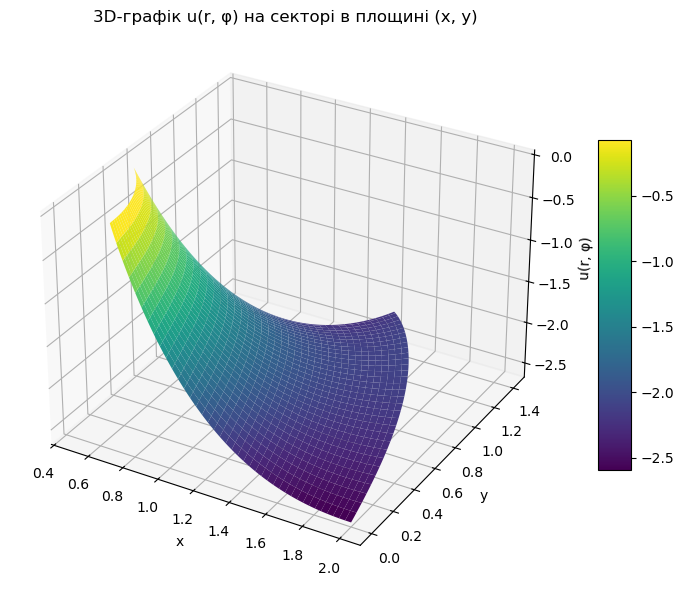

In [110]:
# --- Візуалізація ---

# ---------------------------
# 2D: контур у координатах (r, φ)
# ---------------------------
plt.figure(figsize=(7, 5))
cs = plt.contourf(R, Phi, U_final, levels=30)
plt.colorbar(cs)
plt.title(f"Розв'язок u(r, φ), nr={R.shape[0]}, nφ={R.shape[1]}")
plt.xlabel("r")
plt.ylabel("φ")
plt.tight_layout()
plt.show()

# Для коректного відображення полярних даних, перетворимо їх в декартові координати
R_mesh, PHI_mesh = np.meshgrid(r, phi, indexing='ij')
X = R_mesh * np.cos(PHI_mesh)
Y = R_mesh * np.sin(PHI_mesh)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
c = ax.pcolormesh(X, Y, U_final, shading='gouraud', cmap='viridis')
fig.colorbar(c, label="u(r, φ)")
ax.set_title(f"Розв'язок u(r,φ), nr={nr}, nphi={nphi}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

# ---------------------------
# 3D поверхня у площині (x, y)
# ---------------------------
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')
surf = ax3.plot_surface(X, Y, U_final, cmap='viridis', edgecolor='none')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('u(r, φ)')
ax3.set_title("3D-графік u(r, φ) на секторі в площині (x, y)")
fig.colorbar(surf, ax=ax3, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()

In [111]:
# --- Verification ----------------------------------------------------------
pde_residual = np.zeros_like(U_final)        # (nr, nphi)

for i in range(1, nr - 1):                 
    ri    = r[i]
    r_ip  = ri + dr/2.0
    r_im  = ri - dr/2.0
    for j in range(1, nphi - 1):            
        phij = phi[j]

        lap = ((r_im / (ri * dr**2)) * U_final[i-1, j] +
               (r_ip / (ri * dr**2)) * U_final[i+1, j] +
               (1.0 / (ri**2 * dphi**2)) * (U_final[i, j-1] + U_final[i, j+1]) -
               ((r_ip + r_im) / (ri * dr**2) + 2.0 / (ri**2 * dphi**2)) * U_final[i, j])

        pde_residual[i, j] = lap - f_fun(ri, phij)

# 2. Перевірка граничних умов
bc_inner_r  = np.abs(U_final[0, 1:-1])                                            
bc_outer_r  = np.abs((U_final[nr-1, 1:-1] - U_final[nr-2, 1:-1]) / dr - phi[1:-1]**2)     

bc_phi_0    = np.abs(2.0 * U_final[1:-1, 0] +
                     3.0 * (U_final[1:-1, 1] - U_final[1:-1, 0]) / dphi - 1.0)      

bc_phi_pi4  = np.abs(U_final[1:-1, nphi-1] -
                     2.0 * (U_final[1:-1, nphi-1] - U_final[1:-1, nphi-2]) / dphi)  

print("--- Verification Results ---")
print(f"PDE residual (interior)  : {np.max(np.abs(pde_residual[1:-1, 1:-1])): .2e}")
print(f"BC at r=0.7 (Dirichlet)  : {np.max(bc_inner_r): .2e}")
print(f"BC at r=2.0 (Neumann)    : {np.max(bc_outer_r): .2e}")
print(f"BC at φ=0 (Robin)        : {np.max(bc_phi_0): .2e}")
print(f"BC at φ=π/4 (Robin)      : {np.max(bc_phi_pi4): .2e}")


--- Verification Results ---
PDE residual (interior)  :  4.14e-06
BC at r=0.7 (Dirichlet)  :  0.00e+00
BC at r=2.0 (Neumann)    :  2.04e-14
BC at φ=0 (Robin)        :  1.21e-13
BC at φ=π/4 (Robin)      :  5.73e-14


# Завдання 4. Рівняння Пуассона, яке задане у полярній системі координат (осесиметричний випадок)

Загальний вигляд рівняння:
$$
\Delta u(r)=\frac 1r \frac{d}{dr}\left(r\frac{du}{dr}\right)=f(r)
$$

Після дискретизації:
$$
\left(r_i - \frac{h}{2}\right)u_{i-1} + \left(r_i + \frac{h}{2}\right)u_{i+1} - 2r_i u_i   = h^2 r_i f_i
$$

Задача 4.8

$
f(r)=r^3,\quad r\in[0.9,1.9]
$

$
u(0.9)+u'(0.9)=0,\ \ u(1.9)=1.
$

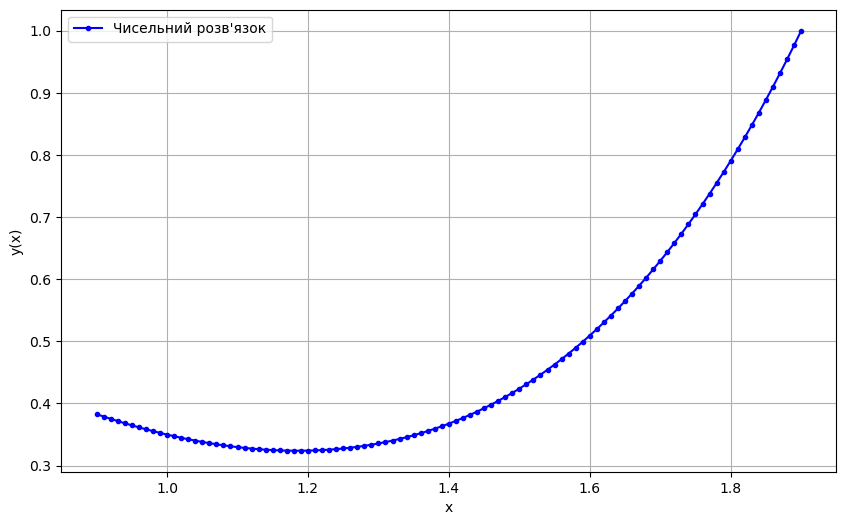

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Налаштування параметрів ---
N = 100  # Кількість точок сітки
rmin, rmax = 0.9, 1.9
r = np.linspace(rmin, rmax, N + 1)
h = (rmax - rmin) / N

# --- 2. Формування коефіцієнтів тридіагональної системи ---
a = np.zeros(N + 1)  # піддіагональ (a[0] не використовується)
b = np.zeros(N + 1)  # головна діагональ
c = np.zeros(N + 1)  # наддіагональ (c[-1] не використовується)
d = np.zeros(N + 1)  # права частина

# --- 3. Заповнення рівнянь для внутрішніх точок ---
i = np.arange(1, N)
a[i] = r[i] - h/2.0
b[i] = -2*r[i]
c[i] = r[i] + h/2.0
d[i] = h**2*r[i]**4

# --- 4. Застосування граничних умов ---
# Ліва межа
b[0] = 1.0 - 1.0/h
c[0] = 1.0/h
d[0] = 0.0

# Права межа
a[N] = 0.0
b[N] = 1.0
c[N] = 0.0
d[N] = 1.0

# --- 5. Розв'язання системи методом прогонки ---
u = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# --- 6. Візуалізація результату ---
plt.figure(figsize=(10, 6))
plt.plot(r, u, label="Чисельний розв'язок", color='blue', marker='o', markersize=3, linestyle='-')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()


# Завдання 5. Рівняння Пуассона у декартових тривимірних координатах

Загальна форма рівняння:

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} + \frac{\partial^2 u}{\partial z^2} = f(x,y,z)
$$

Дискретизація:
$$
\frac{u_{i+1,j,k}^2-2u_{i,j,k}+u_{i-1,j,k}}{\Delta x^2} + \frac{u_{i,j+1,k}^2-2u_{i,j,k}+u_{i,j-1,k}}{\Delta y^2} + \frac{u_{i,j,k+1}^2-2u_{i,j,k}+u_{i,j,k-1}}{\Delta z^2} = f(x_i,y_j,z_k)
$$

$$
\frac{1}{\Delta x^{2}} u_{i+1,j,k} +\frac{1}{\Delta x^{2}} u_{i-1,j,k} +\frac{1}{\Delta y^{2}} u_{i,j+1,k} +\frac{1}{\Delta y^{2}} u_{i,j-1,k} +\frac{1}{\Delta z^{2}} u_{i,j,+1k} +\frac{1}{\Delta z^{2}} u_{i,j,k-1} -\left(\frac{2}{\Delta x^{2}} +\frac{2}{\Delta y^{2}} +\frac{2}{\Delta z^{2}}\right) u_{i,j,k} =f(x_{i} ,y_{j} ,z_{k} )
$$

Задача 5.8

$
\begin{cases}
x \in [1,2], \quad y \in [1,3], \quad z \in [0.5,1.5], \\
f(x,y,z) = e^{-x} - y + z, \\[4pt]
u(1,y,z) = 0, \quad \dfrac{\partial u}{\partial x}(2,y,z) = 1, \\[6pt]
u(x,1,z) + 2\dfrac{\partial u}{\partial y}(x,1,z) = 1, \quad u(x,3,z) = 0, \\[6pt]
u(x,y,0.5) = 0, \quad \dfrac{\partial u}{\partial z}(x,y,1.5) = 2.
\end{cases}
$

In [ ]:
@jit(nopython=True, fastmath=True, cache=True)
def relax3d(ax, ay, az, cx, cy, cz, b, d_rhs,
            nx, ny, nz, U_initial,
            x_vec, y_vec, z_vec, dx, dy, dz,
            omega=1.8, eps=1e-13, max_iter=10000,
            boundary_conditions=None, min_iter=100):

    U = U_initial.copy()
    U_old = U.copy()

    inv_b = np.zeros_like(b)
    inv_b[1:-1, 1:-1, 1:-1] = 1.0 / b[1:-1, 1:-1, 1:-1]

    U = boundary_conditions(U, x_vec, y_vec, z_vec, nx, ny, nz, dx, dy, dz)

    err = 1.0
    it = 0

    while ((err > eps and it < max_iter) or it < min_iter):
        it += 1

        # копія для оцінки помилки
        for i in range(nx):
            for j in range(ny):
                for k in range(nz):
                    U_old[i, j, k] = U[i, j, k]

        for i in range(1, nx - 1):
            for j in range(1, ny - 1):
                for k in range(1, nz - 1):
                    t = ( ax[i,j,k]*U[i-1,j,k] + cx[i,j,k]*U[i+1,j,k]
                        + ay[i,j,k]*U[i,j-1,k] + cy[i,j,k]*U[i,j+1,k]
                        + az[i,j,k]*U[i,j,k-1] + cz[i,j,k]*U[i,j,k+1]
                        - d_rhs[i,j,k]) * inv_b[i,j,k]
                    U[i,j,k] = omega*t + (1.0 - omega)*U[i,j,k]

        U = boundary_conditions(U, x_vec, y_vec, z_vec, nx, ny, nz, dx, dy, dz)

        err = 0.0
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                for k in range(1, nz-1):
                    diff = abs(U[i,j,k] - U_old[i,j,k])
                    if diff > err:
                        err = diff

        if it % 500 == 0:
            print("iter=", it, "err=", err)

    if it >= max_iter and err > eps:
        print("Warning: SOR did not converge in", max_iter, "iterations. Final error:", err)
    else:
        print("Converged in", it, "iterations. Final error:", err)

    return U

In [92]:
@jit(nopython=True, fastmath=True, cache=True)
def boundary_conditions_3(U, x_vec, y_vec, z_vec, nx, ny, nz, dx, dy, dz):
    # x=1: Dirichlet u=0
    for j in range(ny):
        for k in range(nz):
            U[0, j, k] = 0.0

    # x=2: Neumann du/dx=1  -> u_N = u_{N-1} + dx
    for j in range(ny):
        for k in range(nz):
            U[nx-1, j, k] = U[nx-2, j, k] + dx

    # y=3: Dirichlet u=0
    for i in range(nx):
        for k in range(nz):
            U[i, ny-1, k] = 0.0

    # y=1: Robin u + 2*du/dy = 1  -> u_0 = (dy - 2*u_1)/(dy - 2)
    for i in range(nx):
        for k in range(nz):
            U[i, 0, k] = (dy - 2.0*U[i, 1, k]) / (dy - 2.0)

    # z=0.5: Dirichlet u=0
    for i in range(nx):
        for j in range(ny):
            U[i, j, 0] = 0.0

    # z=1.5: Neumann du/dz=2 -> u_N = u_{N-1} + 2*dz
    for i in range(nx):
        for j in range(ny):
            U[i, j, nz-1] = U[i, j, nz-2] + 2.0*dz

    return U


In [ ]:
# розміри
nx, ny, nz = 65, 65, 33
x_vec = np.linspace(1.0, 2.0, nx)
y_vec = np.linspace(1.0, 3.0, ny)
z_vec = np.linspace(0.5, 1.5, nz)
dx = x_vec[1]-x_vec[0]; dy = y_vec[1]-y_vec[0]; dz = z_vec[1]-z_vec[0]

inv_dx2 = 1.0/(dx*dx)
inv_dy2 = 1.0/(dy*dy)
inv_dz2 = 1.0/(dz*dz)

shape = (nx, ny, nz)
ax = np.full(shape, inv_dx2) 
cx = np.full(shape, inv_dx2)
ay = np.full(shape, inv_dy2) 
cy = np.full(shape, inv_dy2)
az = np.full(shape, inv_dz2) 
cz = np.full(shape, inv_dz2)
b  = np.full(shape, 2.0*(inv_dx2+inv_dy2+inv_dz2))

XX, YY, ZZ = np.meshgrid(x_vec, y_vec, z_vec, indexing='ij')

f = lambda x, y, z: np.exp(-x) - y + z
d_rhs = f(XX, YY, ZZ)


In [94]:
# початкове наближення
U0 = np.zeros(shape)

U_final = relax3d(ax, ay, az, cx, cy, cz, b, d_rhs,
            nx, ny, nz, U0,
            x_vec, y_vec, z_vec, dx, dy, dz,
            omega=1.8, eps=1e-10, max_iter=20000,
            boundary_conditions=boundary_conditions_3, min_iter=200)

iter= 500 err= 0.0006515980766745866
iter= 1000 err= 2.8301302597899536e-05
iter= 1500 err= 1.1975704699018763e-06
iter= 2000 err= 5.062894237184423e-08
iter= 2500 err= 2.1403394612207194e-09
Converged in 2985 iterations. Final error: 9.949152612875878e-11


In [ ]:
import plotly.graph_objects as go

XX, YY, ZZ = np.meshgrid(x_vec, y_vec, z_vec, indexing='ij')

fig = go.Figure(data=go.Isosurface(
    x=XX.flatten(), y=YY.flatten(), z=ZZ.flatten(),
    value=U_final.flatten(),
    isomin=U_final.min(), isomax=U_final.max(),
    surface_count=6,         
    colorscale='Viridis',
    opacity=0.7,             
    caps=dict(x_show=False, y_show=False, z_show=False)
))
fig.update_layout(scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'),
                  title='Isosurfaces of U(x,y,z)')
fig.show()


In [95]:
# --- Verification ----------------------------------------------------------
pde_residual = np.zeros_like(U_final)

# 1) PDE residual on interior: ax*U_{i-1}+cx*U_{i+1}+... - b*U_{i,j,k} - d_rhs = 0
for i in range(1, nx-1):
    for j in range(1, ny-1):
        for k in range(1, nz-1):
            lap_disc = ( ax[i,j,k]*U_final[i-1,j,k] + cx[i,j,k]*U_final[i+1,j,k]
                       + ay[i,j,k]*U_final[i, j-1, k] + cy[i,j,k]*U_final[i, j+1, k]
                       + az[i,j,k]*U_final[i, j, k-1] + cz[i,j,k]*U_final[i, j, k+1]
                       - b[i,j,k]*U_final[i,j,k] )
            pde_residual[i,j,k] = lap_disc - d_rhs[i,j,k]

# 2) Boundary conditions
# x=1: Dirichlet u=0
bc_x_min = np.abs(U_final[0, 1:-1, 1:-1])

# x=2: Neumann du/dx = 1
bc_x_max = np.abs((U_final[nx-1,1:-1,1:-1] - U_final[nx-2,1:-1,1:-1]) / dx - 1.0)

# y=3: Dirichlet u=0
bc_y_max = np.abs(U_final[1:-1, ny-1, 1:-1])

# y=1: Robin u + 2 du/dy = 1
bc_y_min = np.abs(U_final[1:-1,0,1:-1] + 2.0*(U_final[1:-1,1,1:-1] - U_final[1:-1,0,1:-1]) / dy - 1.0)

# z=0.5: Dirichlet u=0
bc_z_min = np.abs(U_final[1:-1, 1:-1, 0])

# z=1.5: Neumann du/dz = 2
bc_z_max = np.abs((U_final[1:-1, 1:-1, nz-1] - U_final[1:-1, 1:-1, nz-2]) / dz - 2.0)

# 3) Summary
print("--- Verification Results (3D box) ---")
print(f"PDE residual (interior) : {np.max(np.abs(pde_residual[1:-1,1:-1,1:-1])): .3e}")
print(f"BC x=1 (Dirichlet)      : {np.max(bc_x_min): .3e}")
print(f"BC x=2 (Neumann)        : {np.max(bc_x_max): .3e}")
print(f"BC y=3 (Dirichlet)      : {np.max(bc_y_max): .3e}")
print(f"BC y=1 (Robin)          : {np.max(bc_y_min): .3e}")
print(f"BC z=0.5 (Dirichlet)    : {np.max(bc_z_min): .3e}")
print(f"BC z=1.5 (Neumann)      : {np.max(bc_z_max): .3e}")

--- Verification Results (3D box) ---
PDE residual (interior) :  1.693e-07
BC x=1 (Dirichlet)      :  0.000e+00
BC x=2 (Neumann)        :  1.421e-14
BC y=3 (Dirichlet)      :  0.000e+00
BC y=1 (Robin)          :  1.332e-14
BC z=0.5 (Dirichlet)    :  0.000e+00
BC z=1.5 (Neumann)      :  7.105e-15
